In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmaps
import scipy.stats as stats
import scipy as sp

import getdist
from getdist import plots, MCSamples, loadMCSamples
from astropy.io import fits
from vega import VegaInterface, Wedge
from vega.parameters.param_utils import build_names
%matplotlib inline

In [2]:
def make_chain(names, mean, cov):
    labels = build_names(names)
    gaussian_samples = np.random.multivariate_normal(mean, cov, size=1000000)
    samples = MCSamples(samples=gaussian_samples, names = names, labels = [labels[name] for name in names])
    return samples

def get_res(path):
    hdul = fits.open(path)
    res = {}
    res['chisq'] = hdul[2].header['FVAL']
    res['mean'] = [val for val in hdul[2].data['values']]
    res['cov'] = hdul[2].data['covariance']
    npars = len(hdul[2].data['names'])
    res['pars'] = {hdul[2].data['names'][i]:{'val':hdul[2].data['values'][i], 'err':hdul[2].data['errors'][i]} for i in range(npars)}
    
    chain = make_chain(res['pars'].keys(), res['mean'], res['cov'])
    return res, chain

Run main.ini files in the terminal (run_vega.py main.ini) to get fits files for the different mock/model combinations. Autocross indicates that we're adding the auto and cross correlations. There are two mocks being evaluated, HCDs -> 20 (20) and a realistic full range of HCDs (real). The letters represent different models or mock conditions: c = cooked mock, f = Fvoigt model or fitted continuum, r = Roger model, t = true continuum, m = masked DLAs. I also evaluate multiple scales (r_min cuts), looking at 10 Mpc, 25 Mpc (25), and 35 Mpc (35). No model means that the mock does not include HCD modelling, the Roger model is a previous theoretical exponential model, and the Fvoigt model is a model I calculated by running DLA catalogs for each mock through a series of code in my picca.ipynb notebook. 

In [3]:
res1, chain1 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/autocross/20c25-autocross.fits')
res2, chain2 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/autocross/20f25-autocross.fits')
res3, chain3 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/autocross/20r25-autocross.fits')
res4, chain4 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/autocross/20r-autocross.fits')
res5, chain5 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/autocross/20r35-autocross.fits')
res6, chain6 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/autocross/realt25-autocross.fits')
res7, chain7 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/autocross/realtf25-autocross.fits')
res8, chain8 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/autocross/realtr25-autocross.fits')
res9, chain9 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/autocross/realf25-autocross.fits')
res10, chain10 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/autocross/realfr25-autocross.fits')
res11, chain11 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/autocross/realfm25-autocross.fits')
res12, chain12 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/autocross/realfmr-autocross.fits')
res13, chain13 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/autocross/realfmr25-autocross.fits')
res14, chain14 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/autocross/realfmr35-autocross.fits')
res15, chain15 = get_res('/global/homes/k/kaiaatz/notebooks/outputs/autocross/realfmf25-autocross.fits') #invalid

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [4]:
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['font.size'] = 200

Evaluate the efficiency of different models to determine the Alcock-Paczynski parameter, $\phi_{s}$.

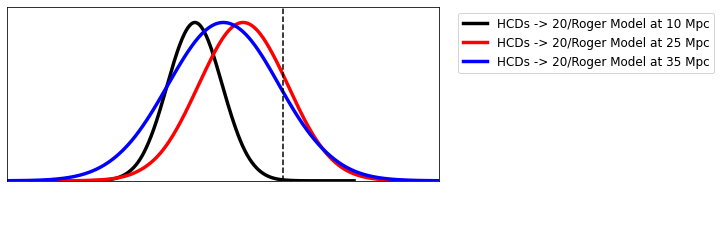

In [5]:
g = getdist.plots.getSinglePlotter(width_inch=12)
g.plot_1d([chain4, chain3, chain5], 'phi_smooth')
g.add_legend([r'HCDs -> 20/Roger Model at 10 Mpc', r'HCDs -> 20/Roger Model at 25 Mpc', r'HCDs -> 20/Roger Model at 35 Mpc'], bbox_to_anchor=(0, 0, 1.65, 1))
g.fig.axes[0].axvline(1, color='k', ls='--')

When all HCDs have a column density $N_{HI} = 10^{20} cm^2$, the Roger model is most effective on a 25 Mpc scale. At 10 Mpc, there is a large deviation and at 35 Mpc, it is still fairly accurate but less precise. 

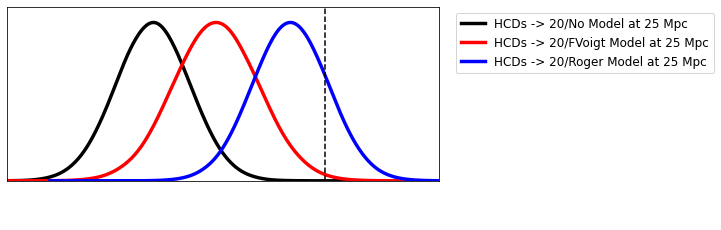

In [6]:
g = getdist.plots.getSinglePlotter(width_inch=12)
g.plot_1d([chain1, chain2, chain3], 'phi_smooth')
g.add_legend([r'HCDs -> 20/No Model at 25 Mpc', r'HCDs -> 20/FVoigt Model at 25 Mpc', r'HCDs -> 20/Roger Model at 25 Mpc'], bbox_to_anchor=(0, 0, 1.65, 1))
g.fig.axes[0].axvline(1, color='k', ls='--')

When all HCDs have a column density $N_{HI} = 10^{20} cm^2$ at 25 Mpc, the Roger model significantly corrects the data which doesn't factor in HCDs. It is also more effective than the Fvoigt model.

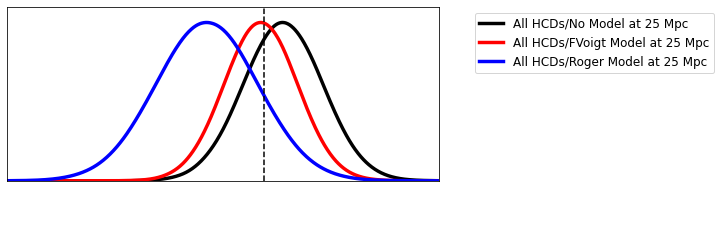

In [7]:
#true unmasked
g = getdist.plots.getSinglePlotter(width_inch=12)
g.plot_1d([chain6, chain7, chain8], 'phi_smooth')
g.add_legend([r'All HCDs/No Model at 25 Mpc', r'All HCDs/FVoigt Model at 25 Mpc', r'All HCDs/Roger Model at 25 Mpc'], bbox_to_anchor=(0, 0, 1.65, 1))
g.fig.axes[0].axvline(1, color='k', ls='--')

For realistic HCD conditions of the true continuum at 25 Mpc, the Fvoigt model does the best job of correcting the unmodeled data. It is more accurate and precise than the Roger model for these conditions.

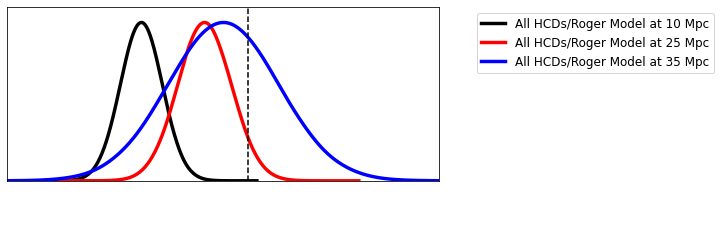

In [8]:
#fitted masked
g = getdist.plots.getSinglePlotter(width_inch=12)
g.plot_1d([chain12, chain13, chain14], 'phi_smooth')
g.add_legend([r'All HCDs/Roger Model at 10 Mpc', r'All HCDs/Roger Model at 25 Mpc', r'All HCDs/Roger Model at 35 Mpc'], bbox_to_anchor=(0, 0, 1.65, 1))
g.fig.axes[0].axvline(1, color='k', ls='--')

For realistic HCD conditions of the fitted continuum with masked DLAs, the Roger model best estimates $\phi_{s}$ when it's on a 35 Mpc scale. At 10 Mpc there is considerable deviation and at 25 Mpc it is still around $2\sigma$ deviation. However, they are a lot more precise.

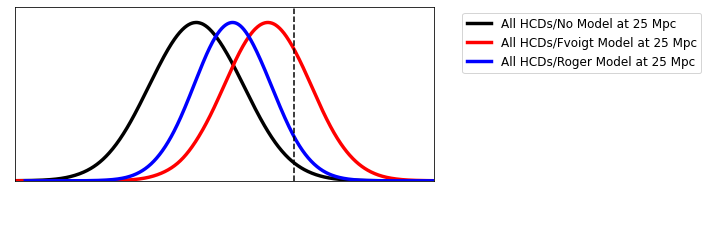

In [9]:
#fitted masked
g = getdist.plots.getSinglePlotter(width_inch=12)
g.plot_1d([chain11, chain15, chain13], 'phi_smooth')
g.add_legend([r'All HCDs/No Model at 25 Mpc', r'All HCDs/Fvoigt Model at 25 Mpc', r'All HCDs/Roger Model at 25 Mpc'], bbox_to_anchor=(0, 0, 1.65, 1))
g.fig.axes[0].axvline(1, color='k', ls='--')

For realistic HCD conditions of the fitted continuum with masked DLAs, the Fvoigt model gives the best measure of the Alcock-Paczynski parameter. The unmodeled HCD and Roger cases are just as precise and not as accurate.